In [1]:
#!pip install fastai
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from fastai import *
from fastai.text import *

In [2]:
tweets_data = pd.read_csv('Tweets.csv') 

In [ ]:
#The goal is to accurately predict the sentiments (positive, neutral, negative) for each tweet
#The actual sentiment is already displayed in airline_sentiment column 
#Use training data to train the ULMFiT model 
#Use the test data to predict the sentiments from the fitted ULMFiT model
#There are different airlines and each tweet is a customer from an airline

In [3]:
tweets_data.head() 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
import re
regex = r"@(VirginAmerica|united|SouthwestAir|Delta|USAirways|AmericanAir)"
def modify_text(text):
    return re.sub(regex, ' ', text, flags=re.IGNORECASE)

tweets_data['text'] = tweets_data['text'].apply(modify_text)

#modifying tweets data by removing the @airline at the beginning of the text

In [5]:
tweets_data.head() 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,plus you've added commercials to the experie...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,I didn't today... Must mean I need to take a...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"it's really aggressive to blast obnoxious ""e...",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
tweets_data_final = tweets_data[['airline_sentiment', 'text']]
tweets_data_final.head()

,airline_sentiment,text
0,neutral,What @dhepburn said.
1,positive,plus you've added commercials to the experie...
2,neutral,I didn't today... Must mean I need to take a...
3,negative,"it's really aggressive to blast obnoxious ""e..."
4,negative,and it's a really big bad thing about it


In [7]:
tweets_data_final['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
tweets_data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [9]:
train_valid, test = train_test_split(tweets_data_final, test_size=0.2, random_state=42)
train, valid = train_test_split(train_valid, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Airline Sentiment For Each Airline')

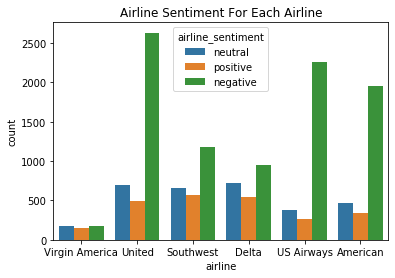

In [10]:
sns.countplot(x="airline", hue='airline_sentiment', data = tweets_data)
plt.title("Airline Sentiment For Each Airline")

#I chose this data visualization because I wanted to see how each airline compared
#in terms of sentiment (positive, neutral, negative)

In [ ]:
#The challenge is to fit the ULMFiT transfer learning method to the US Airlines Tweets Dataset
#I chose the AWD-LTSM pre-trained model with drop-out layers

In [11]:
#Language model

data_lm = TextLMDataBunch.from_df(train_df = train, valid_df = valid, path="")

In [12]:
data_lm.show_batch()

idx,text
0,"xxbos i already did . xxbos @jetblue xxmaj when i got your alert , i immediately started looking to rebook . xxmaj but we only had 11 minutes from reflight xxmaj booking xxmaj problems to catch a flight to xxup xxunk . xxbos i 'm not as sure as you are . http : / / t.co / xxunk xxbos xxmaj like http : / / t.co / xxunk xxbos"
1,", any time you want to answer the phone that would be great . xxbos xxmaj boo for a not refunding a seat upgrade fee i did not want to buy in the first place ! xxbos please xxunk someone at the arriving gate of flight xxunk to xxmaj chicago for either a refund or first class upgrade xxbos it xxup might have went through . xxmaj no confirmation ."
2,xxunk xxup xxunk http : / / t.co / xxunk xxbos @jetblue xxmaj will do . xxmaj thanks ! xxbos @jetblue i just submitted feedback for you xxunk . xxmaj not a good way 2 handle baggage or customers : http : / / t.co / xxunk xxbos xxup ua1740 . xxunk hr mechanical delay all i get is $ 50 voucher ? xxmaj will tweet when i book next
3,"was specifically told i would get a call back from your folks in xxup xxunk should i keep being patient ? xxbos wow this airline is a joke , absolutely horrendous customer service . you guys should be ashamed . xxbos @jetblue at what point do u xxmaj cancelled xxmaj flight flights to xxup dca- other airlines have already xxmaj cancelled xxmaj flightled xxbos xxmaj paid for in flight wifi"
4,"class , xxmaj chairman ca n't move up due 2 silly award travel rule xxunk common sense - customer service fail again ! xxbos xxmaj thank you for responding so quickly with a helpful tool ! xxunk xxbos xxmaj your logo looks like xxup 3d glasses . xxbos thanks to xxmaj marie for reflight xxmaj booking xxmaj problems me and my friends ! ! ! i 'm xxmaj cali bound"


In [13]:
#Fine-tuning the pre-trained Language model

learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.7)

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


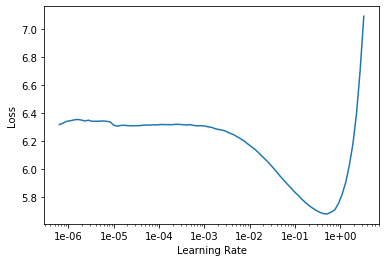

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(1, slice(3e-2/100, 3e-2), moms=(0.8, 0.7), wd=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,4.666651,4.051315,0.252146,15:45


In [17]:
learn.fit_one_cycle(1, slice(3e-2/100, 3e-2))

epoch,train_loss,valid_loss,accuracy,time
0,4.076485,3.966995,0.260371,16:31


In [18]:
learn.unfreeze()

In [19]:
learn.save_encoder('ft_enc')

In [20]:
#Classification model fine-tuning

data_clas = TextClasDataBunch.from_df(path = "", train_df = train, valid_df = valid, vocab=data_lm.train_ds.vocab, bs=32)


In [21]:
#Fine-tuning the pre-trained Classification model

learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.3)
learn.load_encoder('ft_enc')
learn.freeze()

In [22]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


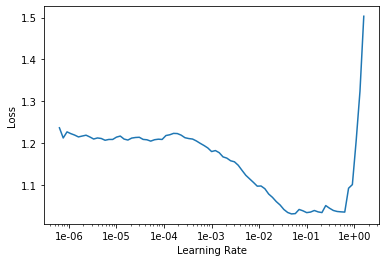

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(1, slice(3e-3/100, 3e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.677977,0.570066,0.766112,11:50


In [25]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(1, slice(5e-3/100, 5e-3), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.565501,0.489784,0.801537,33:21


In [27]:
learn.fit_one_cycle(1, slice(5e-3/100, 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.494297,0.475914,0.810926,36:12


In [28]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(7e-3/100, 7e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.458445,0.471446,0.814341,33:15


In [33]:
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (9369 items)
x: TextList
xxbos xxmaj awesome customer service on # xxunk from rdu . xxmaj they xxunk my wife a warm xxunk . xxmaj thx !,xxbos can you send me another confirmation email ?,xxbos xxunk wow you would n't say,xxbos finally spoke with someone . i have to email the refund dept . i love you guys , but 6 hours in line to be told no dice sucks .,xxbos i already did .
y: CategoryList
positive,neutral,negative,negative,neutral
Path: .;

Valid: LabelList (2343 items)
x: TextList
xxbos @jetblue xxmaj hopefully next time ! xxmaj can i send you my future itineraries so the next one can be planned when i 'm there ? 😂 😂,xxbos @jetblue xxunk do nt talk about my friend @jetblue like that . # xxunk,xxbos xxmaj thanks xxmaj lindsey & & the xxmaj southwest twitter team for great service & & a xxunk resolution # xxunk # swa,xxbos i 'm really xxunk your pretzels , please send me some .,xxbos thanks for seating me next to 2 hot xxunk . xxmaj 

In [38]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(7e-3/100, 7e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.536986,0.488229,0.810499,29:55


In [35]:
learn.fit_one_cycle(1, slice(5e-3/100, 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.630112,0.547024,0.771233,11:49


In [40]:
#The accuracy of these fitted models shows the percentage of sentiments predicted correctly

In [41]:
#Want to see accuracy

interp = TextClassificationInterpretation.from_learner(learn)
acc = accuracy(interp.preds, interp.y_true)
print('Accuracy: {0:.3f}'.format(acc))

Accuracy: 0.810


Text(0.5, 1, 'Classifation Confusion Matrix')

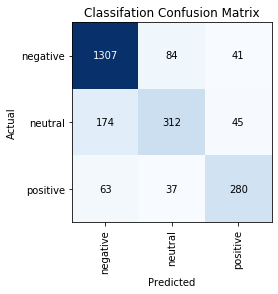

In [42]:
#Confusion matrix to see predicted and actual sentiments

interp.plot_confusion_matrix()
plt.title('Classifation Confusion Matrix')